# **SC1003 Mini Project**

----

### **Team Members**
- Aggarwal Akshay
- Beesetty Venkata Chandra Shrujan Kumar
- Benjamin Ho Zhu En
- Chay Yi Xuan
- Chen Yuguo

----

### **Project Background**
Objective:
- Tasked to develop an algorithm that organise students into diverse and balanced teams for a data science course at NTU

Data: 
- The course has **6,000** students spread across **120** tutorial groups

Team composition:
- Each team should have **5** students 

Criteria for team formation:
1. **CGPA:** Teams should not consist predominantly of students with very high or very low CGPAs
2. **Gender:** Teams should not have a majority of students of the same gender
3. **School affiliation:** Teams should not have a majority of students from the same school

----

### **Computational Thinking Process**

<img src="assets/Coding Draft 1.jpg" width="500"/>


<img src="assets/Coding Draft 2.jpg" width="500"/>

----

### **Analysing the data**

### **csv2dict function**
- Reads the student information from the <span style="color: #1E90FF;">**records.csv**</span> file
- Transforms the data into <span style="color: #1E90FF;">**a list of dictionaries**</span> called "studentInfo", where each dictionary contains a student's info

### Data preparation & Import plotting packages

In [341]:
import matplotlib.pyplot as plt
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 23,
}
def csv2dict(filename):
    with open(filename, "r") as target:
        linesasList = []
        studentInfo = []
        for line in target:
            linesasList.append(line) # to add all the lines of the csv file into a list


        for line in linesasList[1:]:
            # for each value in the CSV file, after the headers, create a dictionary with the following categories for each line.
            tutorial_group, student_id, school, name, gender, cgpa = line.strip().split(',')

            studentInfoAsDict = {
            'Tutorial Group': int(tutorial_group.strip("G-")),
            'Student ID': student_id,
            'Name': name,
            'School': school,
            'Gender': gender,
            'CGPA': float(cgpa)
            }
            
            studentInfo.append(studentInfoAsDict)
    return studentInfo

def studentsAsTutorialGroupLists(list):
    counter = 0
    sortedInto120Lists = []
    temporaryList = []
    for i in list:
        counter += 1
        if counter % 50 == 0:
            temporaryList.append(i)
            sortedInto120Lists.append(temporaryList)
            temporaryList = []
        else:
            temporaryList.append(i)
    return sortedInto120Lists



student_list = csv2dict("records.csv")
tutorial_group_list = studentsAsTutorialGroupLists(csv2dict("records.csv"))

## Gender distribution

+ Count the number of different genders in each tutorial group
+ Illustrate the distribution in the form of stacked bar graph
+ Impossible to realize perfect 1:1 male,female ratio

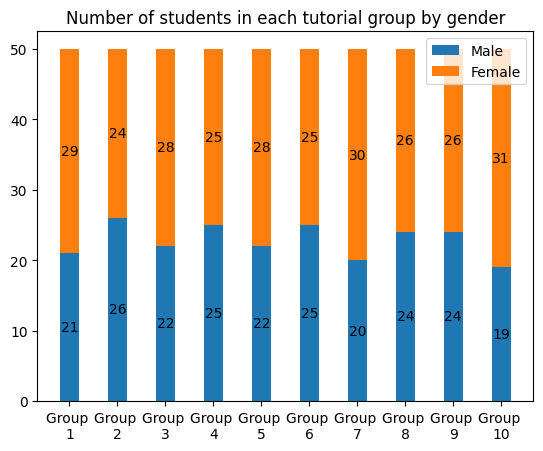

In [342]:

num_of_tutorial_group = 10
male_count = []
female_count = []
width = 0.4


for i in range(num_of_tutorial_group):
    tutorial_group = tutorial_group_list[i]
    gender_male = sum([i["Gender"]=="Male" for i in tutorial_group])
    gender_female = sum([i["Gender"]=="Female" for i in tutorial_group])
    male_count.append(gender_male)
    female_count.append(gender_female)

groups = tuple("Group \n"+str(i+1) for i in range(num_of_tutorial_group))
sex_counts = {"Male":male_count,"Female":female_count}
fig, ax = plt.subplots()
bottom = [0 for i in range(num_of_tutorial_group)]

for key,index in sex_counts.items():
    graph = ax.bar(groups,index,width,label = key,bottom=bottom)
    for j in range(len(index)):
        bottom[j] += index[j]
    ax.bar_label(graph, label_type='center')

ax.set_title('Number of students in each tutorial group by gender')
ax.legend()

plt.show()       


### Distribution of CGPA in group 1

+ extract_feature and sns_input function turns dictionary into form more friendly to plotting graphs
+ 

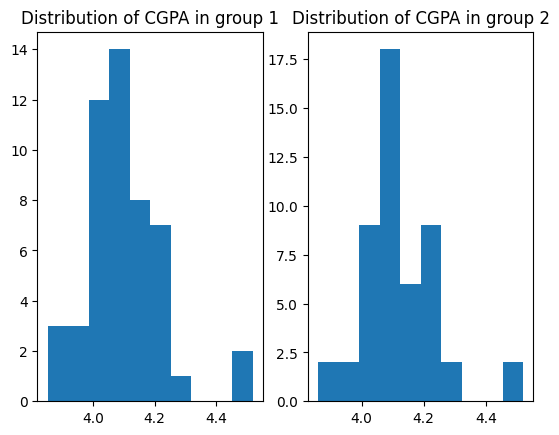

In [343]:
def extract_feature(dictionary,key):
    output = [i[key] for i in dictionary]
    return output


def sns_input(dictionary):
    features = dictionary[0].keys()
    output_dict = {}
    for feature in features:
        f_list= extract_feature(dictionary,feature)
        output_dict.update({feature:f_list})

    return output_dict
fig, axs = plt.subplots(1, 2)

for i in range(len(axs)):
    axs[i].hist(sns_input(tutorial_group_list[i])["CGPA"])
    axs[i].set_title('Distribution of CGPA in group '+str(i+1))
plt.show() 

Text(0.5, 1.0, 'Distribution of CGPA among all students')

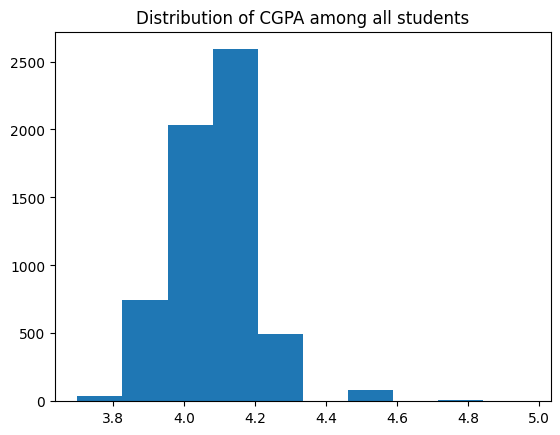

In [344]:
plt.hist(sns_input(student_list)["CGPA"])
plt.title('Distribution of CGPA among all students')

### Distribution of school

Text(0.5, 1.0, 'Distribution by school in group 62')

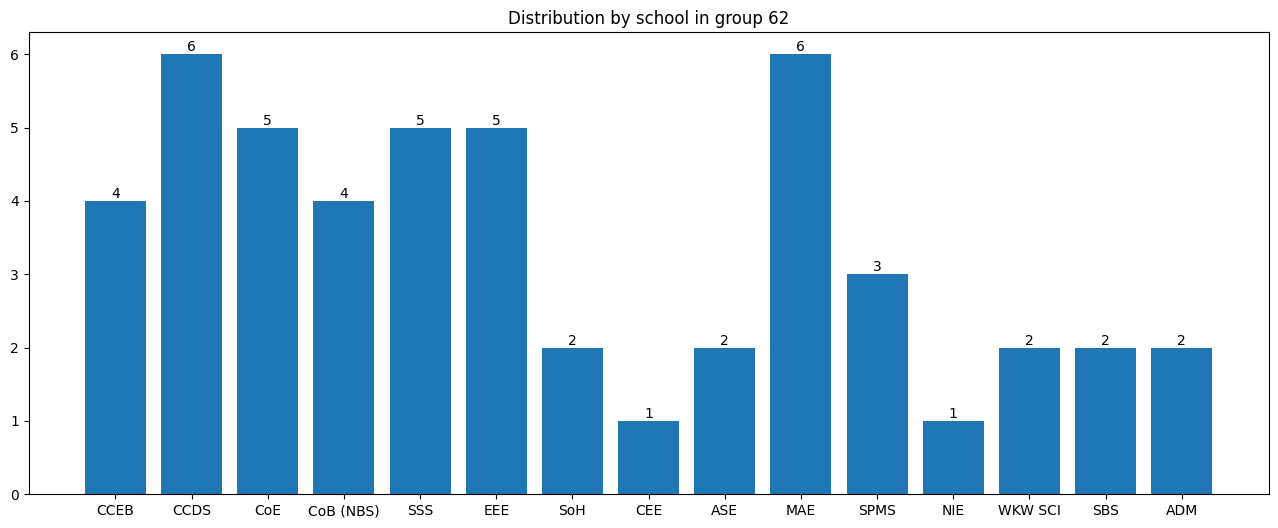

In [345]:
school = sns_input(tutorial_group_list[62])["School"]
name_list = {}
for i in school:
    if i in name_list:
        name_list[i]+=1
    else:
        name_list[i] = 1
fig, ax = plt.subplots(figsize=(16,6))
graph = ax.bar(name_list.keys(),name_list.values())
ax.bar_label(graph)
ax.set_title('Distribution by school in group '+str(62))

----

### **Flowchart**

<img src="assets/Flowchart.jpg" width="600"/>


## **Main Code**

In [346]:
def csv2dict(filename):
    with open(filename, "r") as target:
        linesasList = []
        studentInfo = []
        print("\n Reading the lines of the file... ")
        for line in target:
            linesasList.append(line) # to add all the lines of the csv file into a list
        print(" All lines have been read and stored in the variable 'linesasList' ")

        for line in linesasList[1:]:
            # for each value in the CSV file, after the headers, create a dictionary with the following categories for each line.
            tutorial_group, student_id, school, name, gender, cgpa = line.strip().split(',')

            studentInfoAsDict = {
            'Tutorial Group': int(tutorial_group.strip("G-")),
            'Student ID': student_id,
            'Name': name,
            'School': school,
            'Gender': gender,
            'CGPA': float(cgpa)
            }
            
            studentInfo.append(studentInfoAsDict)
        print(" All student data has been stored into the list 'studentInfo' ")
    return studentInfo

In [347]:
studentsInfoAsDictionaries = csv2dict("records.csv")


 Reading the lines of the file... 
 All lines have been read and stored in the variable 'linesasList' 
 All student data has been stored into the list 'studentInfo' 


### **merge_sort & merge function**
- Merge sort algorithm for quick sorting of "studentsInfoAsDictionaries"

In [348]:
def merge_sort(list, key):
    if len(list) <= 1:
        return list
    mid = len(list) // 2
    left = merge_sort(list[:mid],key)
    right = merge_sort(list[mid:],key)
    return merge(left,right, key)


def merge(left, right, key):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i][key] <= right[j][key]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

- Sorts the list of dictionaries by their "tutorial group" key. Sorts them in <span style="color: #1E90FF;">**ascending tutorial groups**</span>

In [349]:
print("\n Attempting merge-sorting on the student data stored in the list... ")
sortedStudentInfoAsDictionaries = merge_sort(studentsInfoAsDictionaries, "Tutorial Group")
print(" Sorting sucessful! ")


 Attempting merge-sorting on the student data stored in the list... 
 Sorting sucessful! 


- Saves the sorted student data into a new CSV file called "sortedRecords"

In [350]:
print("\n Attempting to save sorted data into CSV file 'sortedRecords'... ")
with open("sortedRecords.csv", "w+") as target:
    for i in sortedStudentInfoAsDictionaries:
        print(i, file=target)
print(" Stored sucessfully! ")


 Attempting to save sorted data into CSV file 'sortedRecords'... 
 Stored sucessfully! 


### **studentsAsTutorialGroupLists function**
- Splits the "sortedStudentInfoAsDictionaries" list into <span style="color: #1E90FF;">**sublists**</span>, with each sublist representing a tutorial group

In [351]:
def studentsAsTutorialGroupLists(list):
    counter = 0
    sortedInto120Lists = []
    temporaryList = []
    for i in list:
        counter += 1
        if counter % 50 == 0:
            temporaryList.append(i)
            sortedInto120Lists.append(temporaryList)
            temporaryList = []
        else:
            temporaryList.append(i)
    return sortedInto120Lists

In [352]:
print("\n Attempting to sort the values into 120 lists with each tutorial group...")
sortedTutorialGroups = studentsAsTutorialGroupLists(sortedStudentInfoAsDictionaries)
print(" Sucessfully seperated them into their assigned tutorial groups ")


 Attempting to sort the values into 120 lists with each tutorial group...
 Sucessfully seperated them into their assigned tutorial groups 


### **gpasort function**
- Sorts each tutorial group (sublist of students) by <span style="color: #1E90FF;">**CGPA (from lowest to highest)**</span>.

In [353]:
def gpasort(list):
    sortedListByGpa = []
    print("\n Attempting to sort the tutorial groups by GPA...")
    for i in list:
        sorted_tutorialGroup = merge_sort(i, "CGPA")
        sortedListByGpa.append(sorted_tutorialGroup)
    print(" Sucessfully sorted all of the groups by GPA ")
    return sortedListByGpa

- Saves the sorted data into a list called "gpasortedTutorialGroups"

In [354]:
gpasortedTutorialGroups = gpasort(sortedTutorialGroups)


 Attempting to sort the tutorial groups by GPA...
 Sucessfully sorted all of the groups by GPA 


### **genderRatio function**
- Gets the ratio of male and female students in the team.

In [355]:
def genderRatio(teams,candidate):
    if len(teams) == 0:
        return (0,0)
    team = teams + [candidate]
    
    maleRatio = len([s for s in team if s["Gender"] == "Male"])/len(team)
    femaleRatio = len([s for s in team if s["Gender"] == "Female"])/len(team)
    return (maleRatio,femaleRatio)

### **teamFormation function**
- Form teams of 5 students within each tutorial group, ensuring that no team has more than 2 students from the same school and no more than 3 students of the same gender
    - Teams are formed by picking students <span style="color: #1E90FF;">**alternatively**</span> based on their GPA and making sure that adding them would not exceed the school and gender limits
        - For <span style="color: #1E90FF;">**even**</span> positions (0, 2, 4) in a team, it selects students with the <span style="color: #1E90FF;">**lowest**</span> GPA
        - For <span style="color: #1E90FF;">**odd**</span> positions  (1, 3, 5) in a team, it selects students with the <span style="color: #1E90FF;">**highest**</span> GPA
    - If adding a student <span style="color: #1E90FF;">**violates the school & gender limits**</span>, the program <span style="color: #1E90FF;">**first tries to find a valid student**</span>. If <span style="color: #1E90FF;">**not possible**</span>, it will <span style="color: #1E90FF;">**relax**</span> the limits.

In [356]:
num_of_student_in_each_group = 5
def teamFormation(list):    
    teamFormedLists = [] 

    for tutorial_group in list: 
        team = []   
        numberOfTeams = 0   
        numberOfStudentsInTheTeam = 0   
        CriteriasRelaxed = False    

        while tutorial_group:  # Continue until all students in the tut group are processed
            if numberOfStudentsInTheTeam % 2 == 0:  # for even index, it will add students from the start of the list (lowest GPA)
                satisfyCriteria = False
                for i in range(len(tutorial_group)):    #iterate over all students in each tutorial group
                    school_count  = 0
                    for s in team:
                        if s["School"] == tutorial_group[i] ["School"]:
                            school_count += 1                           
                    if school_count < 2  and (genderRatio(team,tutorial_group[i])[0]<0.75 and genderRatio(team,tutorial_group[i])[1]<0.75): 
                        added_student = tutorial_group.pop(i) #add student to team and remove them from tut group list
                        team.append(added_student)
                        numberOfStudentsInTheTeam += 1  #increase the number of students in the team by 1
                        satisfyCriteria = True
                        break  # Stop searching once a valid student is added to team
                
                if not satisfyCriteria:
                    # Relax the criteria to allow students from the same school or of the same gender
                    if not CriteriasRelaxed:
                        print(f" Tutorial Group G-{team[0]['Tutorial Group']} Team {numberOfTeams + 1} does not meet the school or gender criteria")
                        CriteriasRelaxed = True
                    for i in range(len(tutorial_group)):
                        added_student = tutorial_group.pop(i)
                        team.append(added_student)
                        numberOfStudentsInTheTeam += 1
                        satisfyCriteria = True
                        break  # Stop searching once a valid student is added to team
                    
            else:  # for odd index, it will add students from the end of the list (highest GPA)
                satisfyCriteria = False
                for i in range(len(tutorial_group) - 1, -1, -1): #search for students in reverse order (from bottom to top)
                    school_count  = 0
                    for s in team:
                        if s["School"] == tutorial_group[i] ["School"]:
                            school_count += 1                           
                    if school_count < 2 and (genderRatio(team,tutorial_group[i])[0]<0.75 and genderRatio(team,tutorial_group[i])[1]<0.75): 
                        added_student = tutorial_group.pop(i)
                        team.append(added_student)
                        numberOfStudentsInTheTeam += 1
                        satisfyCriteria = True
                        break  # Stop searching once a valid student is added to team
                
                if not satisfyCriteria:
                    # Relax the criteria to allow students from the same school or of the same gender
                    if not CriteriasRelaxed:
                        print(f" Tutorial Group G-{team[0]['Tutorial Group']} Team {numberOfTeams + 1} does not meet the school or gender criteria")
                        CriteriasRelaxed = True
                    for i in range(len(tutorial_group) - 1, -1, -1):
                        added_student = tutorial_group.pop(i)
                        team.append(added_student)
                        numberOfStudentsInTheTeam += 1
                        satisfyCriteria = True
                        break  # Stop searching once a valid student is added to team

            if numberOfStudentsInTheTeam % 5 == 0:
                numberOfTeams += 1
                for k in team:
                    k["Team"] = numberOfTeams
                teamFormedLists.append(team)
                team = []  # Reset team for the next team allocation
                CriteriasRelaxed = False # Reset for the next team

    return teamFormedLists

In [357]:
print("\n Attempting to allocate students into teams of 5 in each tutorial group based on GPA and school criteria...")
num_of_student_in_each_group = 5
x = teamFormation(gpasortedTutorialGroups)
print(" All students have been placed into teams!")



 Attempting to allocate students into teams of 5 in each tutorial group based on GPA and school criteria...
 Tutorial Group G-2 Team 9 does not meet the school or gender criteria
 Tutorial Group G-2 Team 10 does not meet the school or gender criteria
 Tutorial Group G-3 Team 10 does not meet the school or gender criteria
 Tutorial Group G-4 Team 8 does not meet the school or gender criteria
 Tutorial Group G-4 Team 9 does not meet the school or gender criteria
 Tutorial Group G-4 Team 10 does not meet the school or gender criteria
 Tutorial Group G-5 Team 9 does not meet the school or gender criteria
 Tutorial Group G-5 Team 10 does not meet the school or gender criteria
 Tutorial Group G-6 Team 10 does not meet the school or gender criteria
 Tutorial Group G-8 Team 10 does not meet the school or gender criteria
 Tutorial Group G-10 Team 10 does not meet the school or gender criteria
 Tutorial Group G-13 Team 10 does not meet the school or gender criteria
 Tutorial Group G-14 Team 10 

### **score function**
- Gets the total diversity score based on GPA variance, gender ratios and the number of unique schools in each team

In [358]:
import math
def loss(team_list):
    score_list = []
    for team in team_list:
        maleRatio = len([s for s in team if s["Gender"] == "Male"])/len(team)
        femaleRatio = len([s for s in team if s["Gender"] == "Female"])/len(team)
        average_gpa = sum([student["CGPA"] for student in team])/len(team)
        std_gpa = math.sqrt(sum([(student["CGPA"]-average_gpa)**2 for student in team])/sum([student["CGPA"] for student in team]))
        name_dict = {}
        for i in team:
            if i["School"] in name_dict:
                name_dict[i["School"]]+=1
            else:
                name_dict[i["School"]] = 1
        school_count_1 = len(name_dict)
        score = (0.5-maleRatio)**2+(0.5-femaleRatio)**2+std_gpa+(num_of_student_in_each_group-school_count_1)
        score_list.append(score)
    
    return score_list

a = loss(x)
print("Score of team formation",1 - (sum(a))/len(a))

Score of team formation 0.24964963604473178


- Saves the new allocated teams data into a new CSV file called "sortedteamRecords"

In [359]:
print("\n Attempting to save allocated teams data into CSV file 'sortedteamRecords'...")
# saves the new formed teams into sortedteamRecords.csv and creates a new column "Team Number"
with open("sortedteamsRecords.csv", "w+") as target:
    target.write("Tutorial Group,Team Number,Student ID,School,Name,Gender,CGPA\n")
    for group in x:
        for student in group:
            line = f"G-{student['Tutorial Group']},team {student['Team']},{student['Student ID']},{student['School']},{student['Name']},{student['Gender']},{student['CGPA']}\n"
            target.write(line)
print(" Stored sucessfully! \n")


 Attempting to save allocated teams data into CSV file 'sortedteamRecords'...
 Stored sucessfully! 



#### Time complexity - O($n^2$)